In [37]:

import laspy
import numpy as np

header = laspy.header.Header()

outfile = laspy.file.File('/tmp/output_test.las', mode="w", header=header)
outfile.X = np.array([1, 2, 3])
outfile.Y = np.array([1, 2, 3])
outfile.Z = np.array([1, 2, 3])

outfile.header.offset = [0, 0, 0]
outfile.header.scale = [1, 1, 1]

outfile.close()




[1.0, 1.0, 1.0]


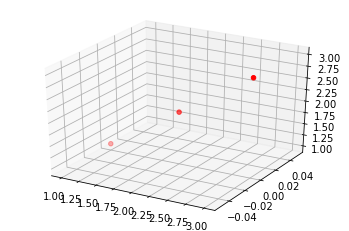

In [38]:
import numpy as np
import laspy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# reading las file and copy points
input_las = laspy.file.File('/tmp/output_test.las', mode="r")
point_records = input_las.points.copy()

print(input_las.header.scale)

# getting scaling and offset parameters
las_scaleX = input_las.header.scale[0]
las_offsetX = input_las.header.offset[0]
las_ScaleY = input_las.header.scale[1]
las_offsetY = input_las.header.offset[1]
las_scaleZ = input_las.header.scale[2]
las_offsetZ = input_las.header.offset[2]

# calculating coordinates
p_X = np.array((point_records['point']['X'] * las_scaleX) + las_offsetX)
p_Y = np.array((point_records['point']['Y'] * las_scaleY) + las_offsetY)
p_Z = np.array((point_records['point']['Z'] * las_scaleZ) + las_offsetZ)

# plotting points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p_X, p_Y, p_Z, c='r', marker='o')
plt.show()


In [16]:
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/lokesh/workspace/deepentools/stats/server/app/client_processing/pypcd')
import os
import pypcd
import laspy
import numpy as np
import zlib

pcd_path = '/home/lokesh/data/minio/deepenai-newdev-eve/928k4NNIrvgf/defaultproject/MjLvL1D2qVYWmZJxxUsdccMq/fused_lidar_new.pcd'
pcd_path = '/home/lokesh/data/minio/deepenai-newdev-eve/rw8adpyw/defaultproject/Ge4F8izexf8TJYkHhEnWyZYW/fused_lidar.pcd'

# pcd_path = '/home/lokesh/data/minio/deepenai-newdev-eve/928k4NNIrvgf/defaultproject/MjLvL1D2qVYWmZJxxUsdccMq/lidar/1594423674150006900.pcd'
pcd_path = '/home/lokesh/data/minio/deepenai-newdev-eve/rw8adpyw/defaultproject/wSRx3CIv4zNdpTwclPqr9ex4/fused_lidar_new.pcd'

# paint_file = '/home/lokesh/data/minio/deepenai-dev-rannotateclientdata/paint_labels/rw8adpyw/defaultproject/wSRx3CIv4zNdpTwclPqr9ex4/Labelling-paint_labels.dpn'
# with open(paint_file, 'rb') as inf:
#         data = inf.read()

#         ddata = zlib.decompress(data)
#         dddata = zlib.decompress(ddata)
#         dddata = np.copy(np.frombuffer(dddata, dtype=np.uint8))

# print(len(dddata))

# print(np.bincount(dddata))
# dddata += 1

if os.path.isfile(pcd_path):
    print('converting::start')
    pc = pypcd.point_cloud_from_path(pcd_path)
    pc_data = pc.pc_data

#     print(pc.get_metadata())
    print(np.mean(pc_data['x']), np.mean(pc_data['y']), np.mean(pc_data['z']))
#     print(np.max(pc_data['x']), np.max(pc_data['y']), np.max(pc_data['z']))
#     print(np.min(pc_data['x']), np.min(pc_data['y']), np.min(pc_data['z']))


    header = laspy.header.Header()
#     header = laspy.header.Header(point_format=2)

    scale = 1000.0
#     scale = 1.0
    
    outfile = laspy.file.File('/home/lokesh/temp/output.las', mode="w", header=header)
    outfile.X = pc_data['x'].flatten() * scale
    outfile.Y = pc_data['y'].flatten() * scale
    outfile.Z = pc_data['z'].flatten() * scale
#     if 'intensity' in pc_data.dtype.names:
#         print('including intensity')
#         outfile.intensity = pc_data['intensity'].flatten() * 255
    
#     outfile.Red = np.ones(len(pc_data), dtype=np.uint8) * 255
#     outfile.Blue = np.zeros(len(pc_data), dtype=np.uint8)
#     outfile.Green = np.zeros(len(pc_data), dtype=np.uint8)
#     outfile.set_red()
    
#     plt.hist(outfile.intensity)
#     plt.title("Histogram of the Intensity Dimension")
#     plt.show()

    outfile.Classification = np.zeros(len(pc_data['x']), dtype=np.uint8)
    
    
    xmin = np.floor(np.min(pc_data['x'] * scale))
    ymin = np.floor(np.min(pc_data['y'] * scale))
    zmin = np.floor(np.min(pc_data['z'] * scale))
    
    xmax = np.floor(np.max(pc_data['x'] * scale))
    ymax = np.floor(np.max(pc_data['y'] * scale))
    zmax = np.floor(np.max(pc_data['z'] * scale))
    
    
#     print(xmin, ymin, zmin)
#     print(xmax, ymax, zmax)

#     print(np.mean(outfile.X))
#     print(np.mean(outfile.Y))
#     print(np.mean(outfile.Z))

    outfile.header.offset = [xmin,ymin,zmin]
    outfile.header.scale = [1/scale,1/scale,1/scale]
    
#     outfile.header.min = [np.min(pc_data['x']) * scale, np.min(pc_data['y']) * scale, np.min(pc_data['z']) * scale]
#     outfile.header.max = [np.max(pc_data['x']) * scale, np.max(pc_data['y']) * scale, np.max(pc_data['z']) * scale]
    
    outfile.header.update_min_max();
    print(outfile.header.get_max())
    print(outfile.header.get_min())
    print(outfile.header.offset)
#     print(outfile.header.point_data_format)

    outfile.close()
    print('done exporting to las file')
else:
    print('pcd file not found')


converting::start
58.289986 643.6655 -4.955633
[-189954.759, 408608.277, -94425.208]
[-190456.265, 408120.713, -94600.505]
[-190266.0, 407713.0, -94506.0]
done exporting to las file


In [12]:

# encoding='BROTLI'
# encoding='DEFAULT'

# !docker run -v /home/lokesh/temp/:/temp potreeconverter:latest /temp/output.las --outdir /temp/output/ --encoding $encoding

# !docker run -v /home/lokesh/temp/:/temp potreeconverter:latest /temp/output.las --outdir /temp/output/ --encoding $encoding

In [17]:
import laspy
import numpy as np

infile = laspy.file.File("/home/lokesh/temp/output.las", mode="r")

print(infile.header.max)
print(infile.header.min)
print(infile.header.min)

print(np.mean(infile.X), np.max(infile.X))
print(np.mean(infile.Y))
print(np.mean(infile.Z))


[-189954.759, 408608.277, -94425.208]
[-190456.265, 408120.713, -94600.505]
[-190456.265, 408120.713, -94600.505]
58289.515905302556 311241
643664.770472851
-4955.263652354318


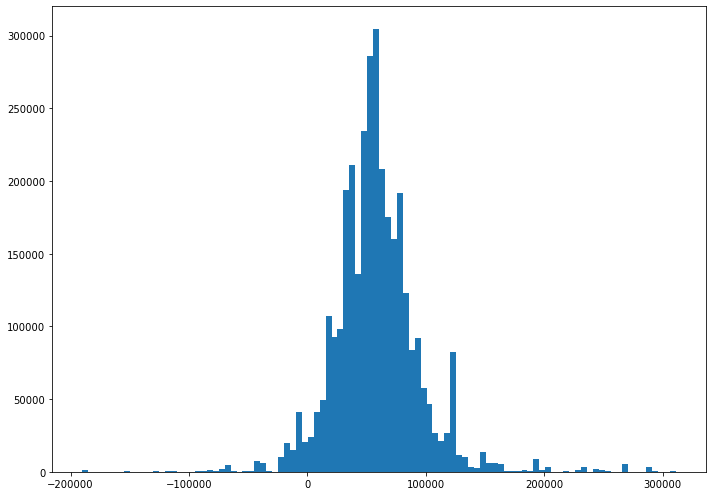

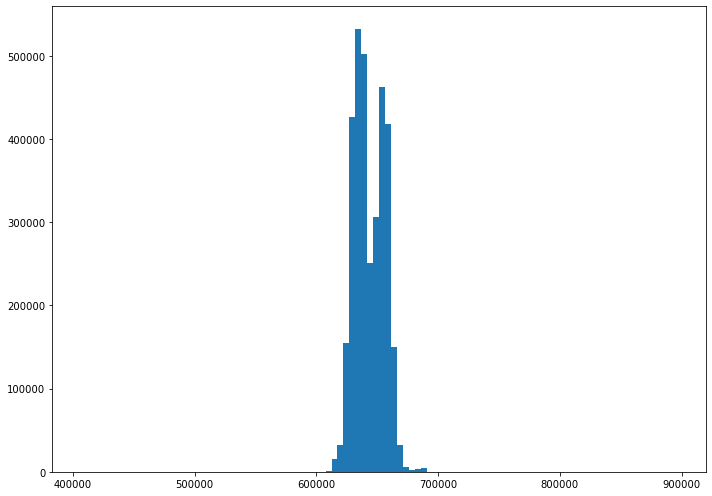

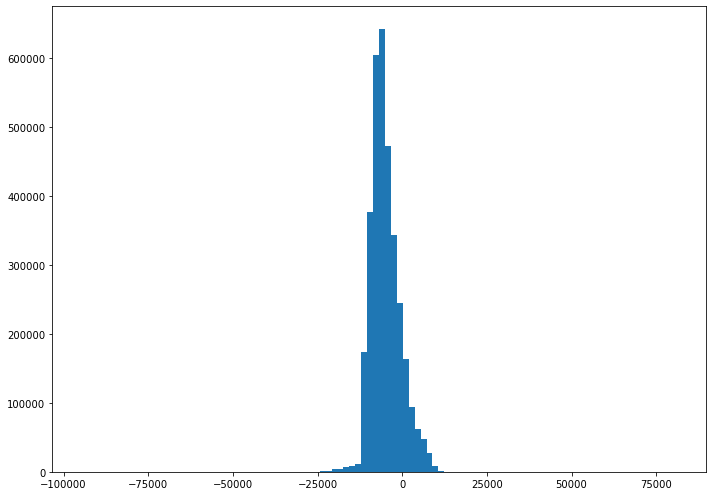

In [33]:
1/3300786

n_bins = 100
fig, axs = plt.subplots(1, 1, figsize=(10, 7), tight_layout=True)
axs.hist(infile.X, bins=n_bins)
plt.show()

fig1, axs1 = plt.subplots(1, 1, figsize=(10, 7), tight_layout=True)
axs1.hist(infile.Y, bins=n_bins)
plt.show()

figz, axsz = plt.subplots(1, 1, figsize=(10, 7), tight_layout=True)
axsz.hist(infile.Z, bins=n_bins)
plt.show()